In [1]:
import os

import anndata as ad
import pandas as pd

from SpatialQuery import spatial_query_single
pd.set_option('display.max_colwidth', 1000)

data_path = "/Users/sa3520/BWH/spatial query/python/data/HBM987_KWLK_254/"

# adata_expr = ad.read_h5ad(os.path.join(data_path, 'expr.h5ad'))
adata = ad.read_h5ad(os.path.join(data_path, 'secondary_analysis.h5ad'))

spatial_key = 'X_spatial'
label_key = 'predicted.ASCT.celltype'

In [2]:
adata

AnnData object with n_obs × n_vars = 4058 × 26265
    obs: 'n_genes', 'n_counts', 'leiden', 'umap_density', 'predicted.ASCT.celltype', 'predicted.ASCT.celltype.score'
    var: 'hugo_symbol', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'annotation_metadata', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'umap_density_params'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_proj'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unscaled', 'unspliced'
    obsp: 'connectivities', 'distances'

In [3]:
# Test building kd tree
sp = spatial_query_single.spatial_query_single(adata=adata, dataset='test', spatial_key=spatial_key,
                                               label_key=label_key)

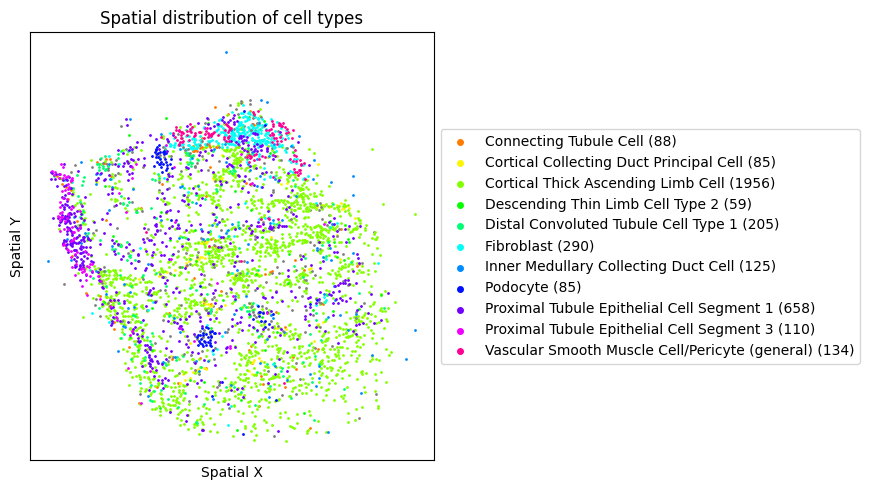

In [4]:
sp.plot_fov(fig_size=(8,5))

In [7]:
import ipywidgets as widgets
from IPython.display import display

# Function to display the current values of parameters
def display_parameters(k, radius, min_support, is_duplicate,):
    print(f"Current value of k: {k}")
    print(f"Current value of radius: {radius}")
    print(f"Current value of min_support: {min_support:.2f}")
    print(f"Is duplicate considered: {'Yes' if is_duplicate else 'No'}")

# Slider for the number of nearest neighbors (k)
k_slider = widgets.IntSlider(
    value=30,  # Initial value
    min=1,    # Minimum value
    max=500,   # Maximum value
    step=1,   # Step size
    description='k (Number of Neighbors):',
    continuous_update=False
)

# Slider for the minimum support
min_support_slider = widgets.FloatSlider(
    value=0.5,  # Initial value
    min=0.0,    # Minimum value
    max=1.0,    # Maximum value
    step=0.01,  # Step size
    description='Min Support:',
    continuous_update=False
)

# Slider for the radius in radius-based neighborhoods
radius_slider = widgets.FloatSlider(
    value=100,  # Initial value
    min=1,    # Minimum value
    max=500,    # Maximum value
    step=1,  # Step size
    description='Radius:',
    continuous_update=False
)

# Checkbox for considering duplicates
is_duplicate_checkbox = widgets.Checkbox(
    value=False,
    description='Consider Duplicates:',
    disabled=False
)

# Use widgets.interactive to link the widgets to the display function
interactive_widget = widgets.interactive(
    display_parameters,
    k=k_slider,
    radius=radius_slider,
    min_support=min_support_slider,
    is_duplicate=is_duplicate_checkbox,
    
)

# Display the interactive widgets
display(interactive_widget)

interactive(children=(IntSlider(value=30, continuous_update=False, description='k (Number of Neighbors):', max…

In [38]:
k = k_slider.value
min_support = min_support_slider.value
is_duplicate = is_duplicate_checkbox.value
radius = radius_slider.value

print(k)
print(min_support)
print(is_duplicate)
print(radius)

30
0.5
False
100.0


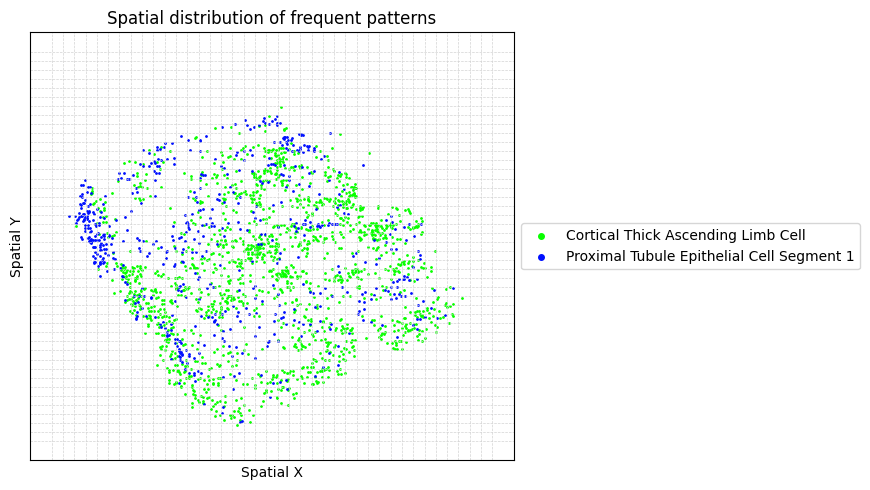

,itemsets,support
0,"[Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1]",0.560209


In [52]:
# visualize frequent motifs (combination of cell types)
fp_grid, _ = sp.find_patterns_grid(
    max_dist=radius,
    min_support=min_support,
    dis_duplicates=is_duplicate,
    if_display=True,
    fig_size=(8,5),
    return_grid=True,
    min_size=0,
    
)
fp_grid

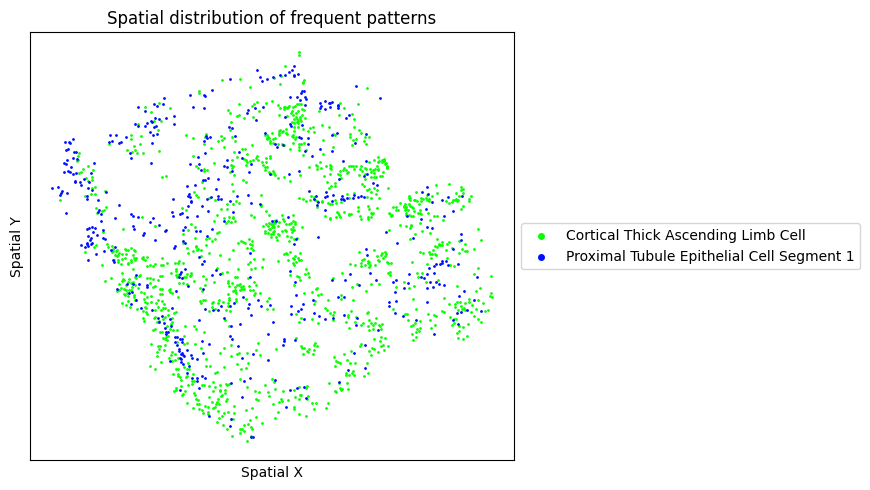

,itemsets,support
0,"[Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1]",0.529321


In [55]:
fp_rand = sp.find_patterns_rand(
    max_dist=radius, 
    n_points=1000,
    min_support=min_support,
    dis_duplicates=is_duplicate,
    min_size=0,
    fig_size=(8,5)
)
fp_rand

In [40]:
ct = 'Fibroblast'
fp_knn_around_ct = sp.find_fp_knn(
    ct=ct, 
    k=k,
    min_support=min_support,
    dis_duplicates=is_duplicate
)
fp_knn_around_ct

,itemsets,support
0,"[Fibroblast, Vascular Smooth Muscle Cell/Pericyte (general)]",0.617241
1,"[Cortical Thick Ascending Limb Cell, Fibroblast, Proximal Tubule Epithelial Cell Segment 1]",0.503448


In [44]:
motifs = fp_knn_around_ct['itemsets'].tolist()
motif_enrich_knn = sp.motif_enrichment_knn(
    ct=ct, 
    motifs=motifs,
    k=k,
    min_support=min_support,
    dis_duplicates=is_duplicate,
    max_dist=100,
)
motif_enrich_knn

,center,motifs,n_center_motif,n_center,n_motif,p-values,corrected p-values,if_significant
0,Fibroblast,"[Fibroblast, Vascular Smooth Muscle Cell/Pericyte (general)]",172,290,596,1.331221e-77,2.662442e-77,True
1,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast, Proximal Tubule Epithelial Cell Segment 1]",125,290,1187,6.629676e-08,6.629676e-08,True


In [41]:
ct = 'Fibroblast'
fp_dist_around_ct = sp.find_fp_dist(
    ct=ct, 
    max_dist=radius,
    min_support=min_support,
    dis_duplicates=is_duplicate,
    min_size=0
)
fp_dist_around_ct

,itemsets,support
0,"[Cortical Thick Ascending Limb Cell, Fibroblast, Proximal Tubule Epithelial Cell Segment 1]",0.557093
1,"[Cortical Thick Ascending Limb Cell, Fibroblast, Vascular Smooth Muscle Cell/Pericyte (general)]",0.532872
2,[Inner Medullary Collecting Duct Cell],0.525952


In [45]:
motifs = fp_dist_around_ct['itemsets'].tolist()
motif_enrich_dist = sp.motif_enrichment_dist(
    ct=ct, 
    motifs=motifs,
    dis_duplicates=is_duplicate,
    max_dist=radius,
    min_support=min_support,
    min_size=0,
)
motif_enrich_dist

,center,motifs,n_center_motif,n_center,n_motif,p-values,corrected p-values,if_significant
0,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast, Vascular Smooth Muscle Cell/Pericyte (general)]",154,290,444,1.353346e-80,4.060039e-80,True
1,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast, Proximal Tubule Epithelial Cell Segment 1]",161,290,794,1.337236e-46,2.005854e-46,True
2,Fibroblast,[Inner Medullary Collecting Duct Cell],152,290,1431,1.875673e-10,1.875673e-10,True


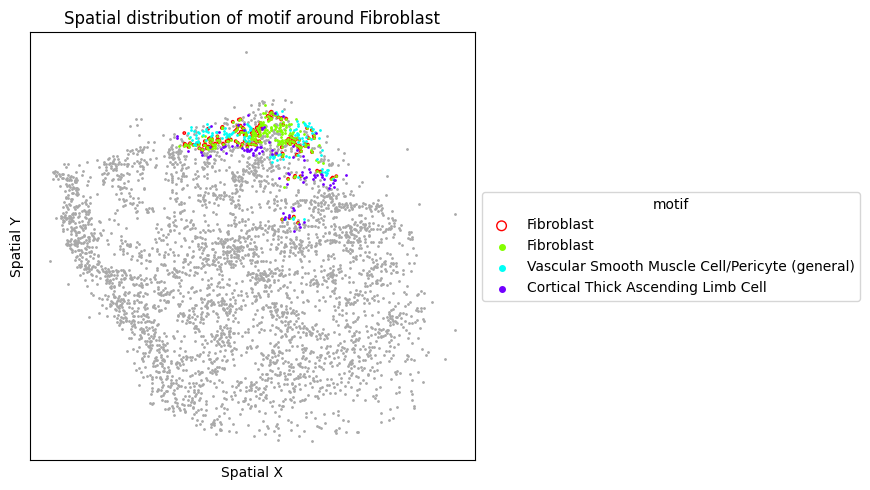

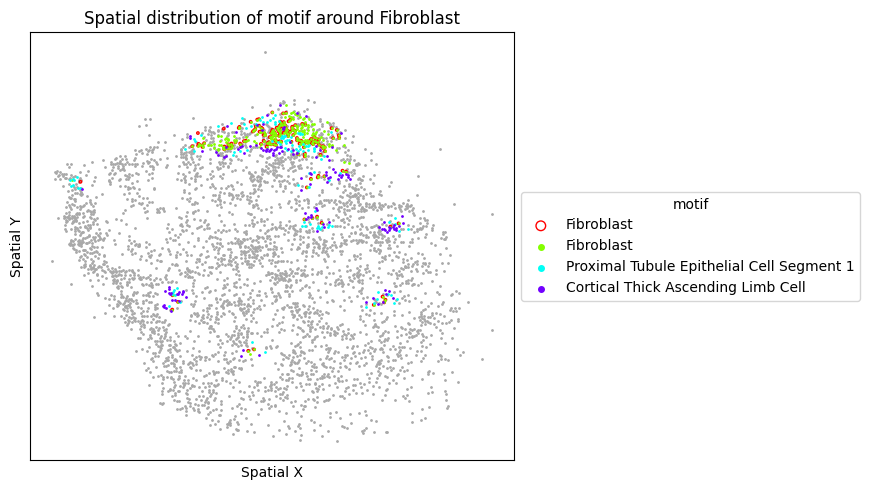

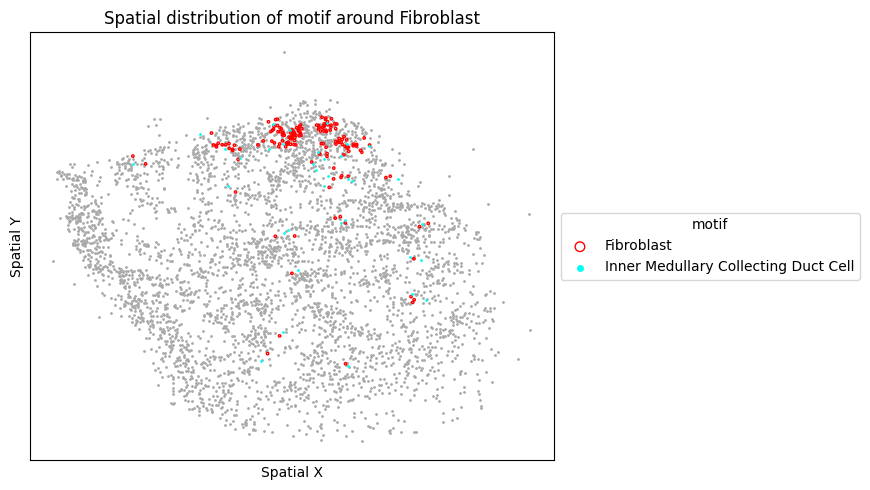

In [49]:
motifs = motif_enrich_dist[motif_enrich_dist['if_significant']]
motifs = motifs['motifs'].tolist()
for motif in motifs:
    sp.plot_motif_celltype(
        ct=ct, 
        motif=motif,
        max_dist=radius,
        fig_size=(8,5)
    )